1. Вывести все уникальные бренды, у которых есть хотя бы один продукт со стандартной стоимостью выше 1500 долларов, и суммарными продажами не менее 1000 единиц.
  

In [3]:
SELECT brand
FROM product
inner JOIN order_items ON product.product_id = order_items.product_id
GROUP BY product.brand
HAVING
    SUM(order_items.quantity) >= 1000
    AND MAX(product.standard_cost) > 1500;

SyntaxError: invalid syntax (ipython-input-9436787.py, line 1)

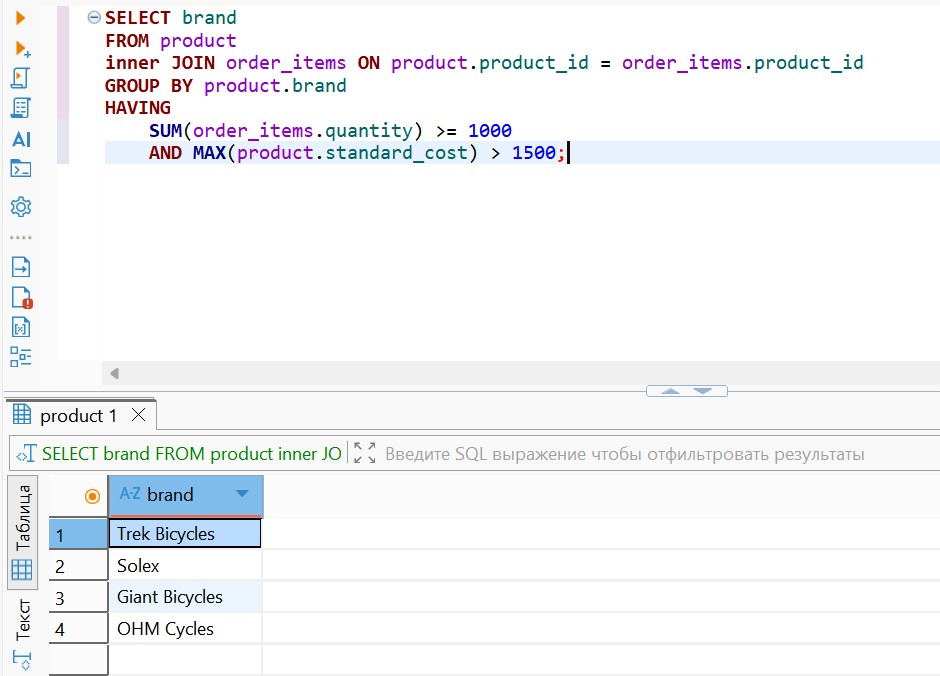

2. Для каждого дня в диапазоне с 2017-04-01 по 2017-04-09 включительно вывести количество подтвержденных онлайн-заказов и количество уникальных клиентов, совершивших эти заказы.

In [ ]:
SELECT
    --orders.order_date, -- Можно убедится что дата принадлежит интересующему нас диапазону
    COUNT(*) AS confirmed_online_orders,
    COUNT(DISTINCT orders.customer_id) AS unique_customers
FROM orders
WHERE
    orders.order_date BETWEEN '2017-04-01' AND '2017-04-09'
    AND orders.online_order = true
    AND orders.order_status = 'Approved'
GROUP BY
    orders.order_date


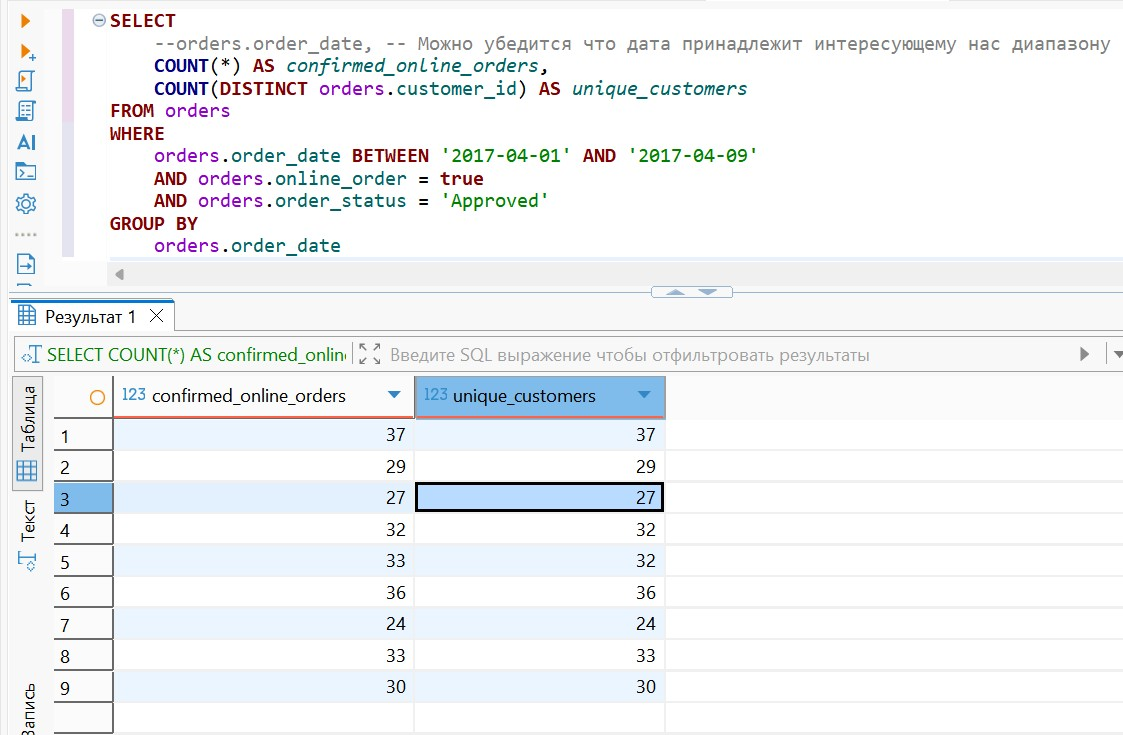

3. Вывести профессии клиентов:
  из сферы IT, чья профессия начинается с Senior;
  из сферы Financial Services, чья профессия начинается с Lead.

Для обеих групп учитывать только клиентов старше 35 лет. Объединить выборки с помощью UNION ALL.

4. Вывести бренды, которые были куплены клиентами из сферы Financial Services, но не были куплены клиентами из сферы IT.

In [ ]:
SELECT DISTINCT p.brand
FROM product p
JOIN order_items oi ON p.product_id = oi.product_id
JOIN orders o ON oi.order_id = o.order_id
JOIN customer c ON o.customer_id = c.customer_id
WHERE c.job_industry_category = 'Financial Services'
  AND NOT EXISTS (
        SELECT 1
        FROM product p2
        JOIN order_items oi2 ON p2.product_id = oi2.product_id
        JOIN orders o2 ON oi2.order_id = o2.order_id
        JOIN customer c2 ON o2.customer_id = c2.customer_id
        WHERE p2.brand = p.brand
          AND c2.job_industry_category = 'IT'
  );


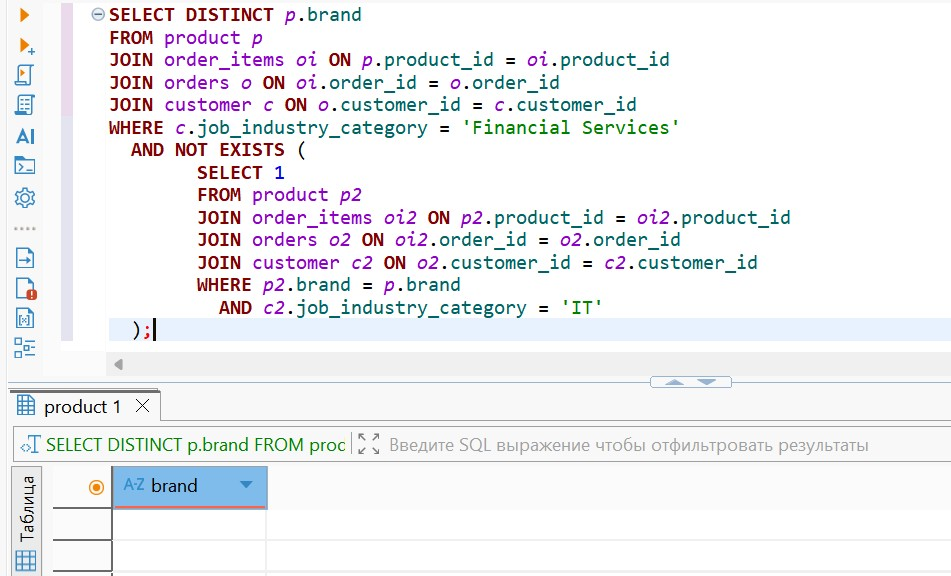

5. Вывести 10 клиентов (ID, имя, фамилия), которые совершили наибольшее количество онлайн-заказов (в штуках) брендов Giant Bicycles, Norco Bicycles, Trek Bicycles, при условии, что они активны и имеют оценку имущества (property_valuation) выше среднего среди клиентов из того же штата.

In [ ]:
SELECT
    c.customer_id,
    c.first_name,
    c.last_name
FROM customer c
INNER JOIN orders o ON c.customer_id = o.customer_id
INNER JOIN order_items oi ON o.order_id = oi.order_id
INNER JOIN product p ON oi.product_id = p.product_id
WHERE
    -- Только активные клиенты (не умершие)
    c.deceased_indicator = 'N'
    -- Только онлайн-заказы
    AND o.online_order = 'Y'
    -- Только подтверждённые заказы
    AND o.order_status = 'Approved'
    -- Только бренды: Giant Bicycles, Norco Bicycles, Trek Bicycles
    AND p.brand IN ('Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles')
    -- property_valuation выше среднего по штату
    AND c.property_valuation > (
        SELECT AVG(c2.property_valuation)
        FROM customer c2
        WHERE c2.state = c.state
    )
GROUP BY c.customer_id, c.first_name, c.last_name
ORDER BY SUM(oi.quantity) DESC
LIMIT 10;



6. Вывести всех клиентов (ID, имя, фамилия), у которых нет подтвержденных онлайн-заказов за последний год, но при этом они владеют автомобилем и их сегмент благосостояния не Mass Customer.

7. Вывести всех клиентов из сферы 'IT' (ID, имя, фамилия), которые купили 2 из 5 продуктов с самой высокой list_price в продуктовой линейке Road.

In [ ]:
WITH top_5_road_products AS (
    SELECT product_id
    FROM product
    WHERE product_line = 'Road'
    ORDER BY list_price DESC
    LIMIT 5
),
customers_with_top_purchases AS (
    SELECT
        c.customer_id,
        c.first_name,
        c.last_name,
        COUNT(oi.product_id) AS count_purchased_top_products
    FROM customer c
    INNER JOIN orders o ON c.customer_id = o.customer_id
    INNER JOIN order_items oi ON o.order_id = oi.order_id
    WHERE
        c.job_industry_category = 'IT'
        AND o.order_status = 'Approved'
        AND oi.product_id IN (SELECT product_id FROM top_5_road_products)
    GROUP BY c.customer_id, c.first_name, c.last_name
)
SELECT
    customer_id,
    first_name,
    last_name
FROM customers_with_top_purchases
WHERE count_purchased_top_products >= 2;


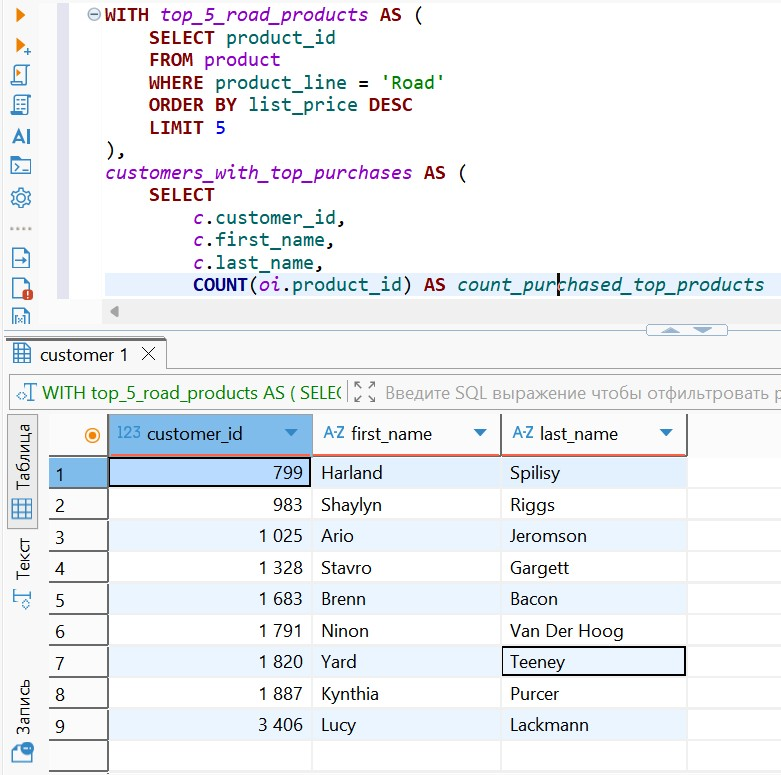

8. Вывести клиентов (ID, имя, фамилия, сфера деятельности) из сфер IT или Health, которые совершили не менее 3 подтвержденных заказов в период 2017-01-01 по 2017-03-01, и при этом их общий доход от этих заказов превышает 10 000 долларов.
Разделить вывод на две группы (IT и Health) с помощью UNION.